In [ ]:
import numpy as np
import pandas as pd
import keras
import tensorflow as tf


In [ ]:
import tensorflow as tf
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 15436208246899220642
xla_global_id: -1
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 14357954560
locality {
  bus_id: 1
  links {
  }
}
incarnation: 17014731928627042790
physical_device_desc: "device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5"
xla_global_id: 416903419
]


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
from keras.datasets import mnist
(x_train,y_train),(x_test,y_test)=mnist.load_data()



11490434/11490434 [==============================] - 0s 0us/step


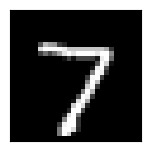

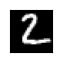

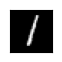

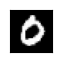

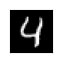

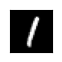

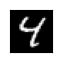

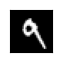

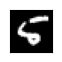

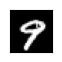

In [ ]:
import matplotlib.pyplot as plt
n=10
plt.figure(figsize=(20,4))
for i in range(n):
  ax=plt.subplot(2,n,i+1)
  plt.imshow(x_test[i].reshape(28,28))
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)
  plt.show()
  plt.close()

In [ ]:
print("x_train shape:",x_train.shape)
print("y_train.shape:",y_train.shape)
print("x_test shape:",x_test.shape)
print("y_test shape:",y_test.shape)

x_train shape: (60000, 28, 28)
y_train.shape: (60000,)
x_test shape: (10000, 28, 28)
y_test shape: (10000,)


In [ ]:
x_train=x_train.reshape(x_train.shape[0],28,28,1)
x_test=x_test.reshape(x_test.shape[0],28,28,1)

In [ ]:
x_train=x_train.astype("float32")
x_test=x_test.astype("float32")
x_train/=255
x_test/=255

In [ ]:
from keras.utils import to_categorical
y_train=to_categorical(y_train,num_classes=10)
y_test=to_categorical(y_test,num_classes=10)
print("x_train shape:",x_train.shape)
print("y_train shape:",y_train.shape)
print("x_test shape:",x_test.shape)
print("y_test shape:",y_test.shape)


x_train shape: (60000, 28, 28, 1)
y_train shape: (60000, 10)
x_test shape: (10000, 28, 28, 1)
y_test shape: (10000, 10)


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D


In [ ]:
img_rows,img_cols,channels=28,28,1
filters=[6,32,80,120]
classes=10

In [ ]:
# Creating Model

model=Sequential() #Sequential is a container to store layers
model.add(Conv2D(filters[0],(3,3),padding='same',\
                 activation='relu',input_shape=(img_rows,img_cols, channels)))
model.add(MaxPooling2D(pool_size=(2,2))) #For reducing image size
# (dim+pad-kernel)/2   (28 +3 -3)/2 = 14
model.add(Conv2D(filters[1],(2,2),padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
# (dim+pad-kernel)/2   (14 +2 -2)/2 = 7
model.add(Conv2D(filters[2],(2,2),padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
# (dim+pad-kernel)/2   (7 +2 -2)/2 = 3
model.add(Conv2D(filters[3],(2,2),padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
# (dim+pad-kernel)/2   (3 +2 -2)/2 = 1
model.add(Flatten())
model.add(Dense(64,activation='relu'))
model.add(Dense(classes, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 6)         60        
                                                                 
 max_pooling2d (MaxPooling2  (None, 14, 14, 6)         0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 32)        800       
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 7, 7, 32)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 7, 7, 80)          10320     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 3, 3, 80)          0

## **training of** **CNN**

In [ ]:
model.fit(x_train,y_train,validation_split=0.2,epochs=15,batch_size=64,verbose=1)

Epoch 1/15
750/750 [==============================] - 13s 6ms/step - loss: 2.2116 - accuracy: 0.3145 - val_loss: 1.7565 - val_accuracy: 0.6093
Epoch 2/15
750/750 [==============================] - 4s 6ms/step - loss: 0.7185 - accuracy: 0.7885 - val_loss: 0.3629 - val_accuracy: 0.8834
Epoch 3/15
750/750 [==============================] - 4s 5ms/step - loss: 0.2631 - accuracy: 0.9188 - val_loss: 0.1840 - val_accuracy: 0.9432
Epoch 4/15
750/750 [==============================] - 4s 5ms/step - loss: 0.1746 - accuracy: 0.9464 - val_loss: 0.1400 - val_accuracy: 0.9567
Epoch 5/15
750/750 [==============================] - 4s 6ms/step - loss: 0.1347 - accuracy: 0.9577 - val_loss: 0.1615 - val_accuracy: 0.9500
Epoch 6/15
750/750 [==============================] - 4s 5ms/step - loss: 0.1135 - accuracy: 0.9640 - val_loss: 0.1002 - val_accuracy: 0.9682
Epoch 7/15
750/750 [==============================] - 4s 5ms/step - loss: 0.0977 - accuracy: 0.9684 - val_loss: 0.1136 - val_accuracy: 0.9643
Epoch

# **Testing the model**

In [ ]:
from sklearn.metrics import accuracy_score
import numpy as np
import matplotlib.pyplot as plt
y_pred_probs=model.predict(x_test,verbose=0)
y_pred=np.where(y_pred_probs>0.5,1,0)
test_accuracy=accuracy_score(y_pred,y_test)
print("\n  test accuracy: {}".format(test_accuracy))



  test accuracy: 0.9828


In [ ]:
mask=range(20,50)
X_valid=x_test[20:40]
actual_labels=y_test[20:40]
y_pred_probs_valid=model.predict(X_valid)
y_pred_valid=np.where(y_pred_probs_valid>0.5,1,0)

1/1 [==============================] - 0s 131ms/step


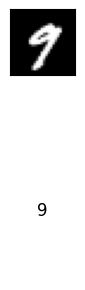

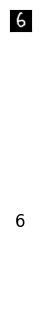

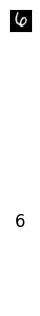

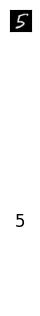

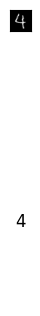

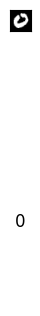

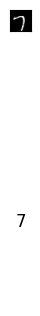

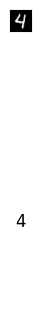

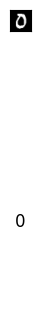

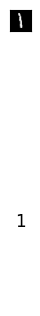

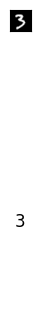

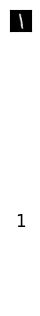

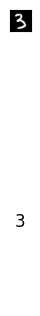

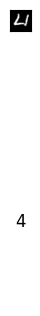

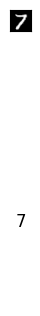

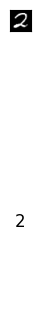

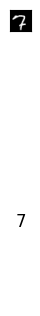

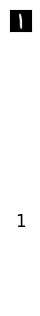

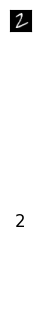

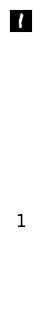

In [ ]:
n=len(X_valid)
plt.figure(figsize=(20,4))
for i in range(n):
  ax=plt.subplot(2,n,i+1)
  plt.imshow(X_valid[i].reshape(28,28))
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)
  predicted_digit=np.argmax(y_pred_probs_valid[i])
  ax=plt.subplot(2,n,i+1+n)
  plt.text(0.5,0.5,str(predicted_digit),fontsize=12,ha="center",va='center')
  plt.axis('off')
  plt.show()
  plt.close()